# **Assignment No. 5**

**Title:** Assignment on Association Rule Learning   

*   List item
*   List item


**Aim:** Implement Apriori algorithm on Market Basket Optimization dataset  

**Objectives:**

1. Data Preprocessing

2. Generate the list of transactions from the dataset

3. Train Apriori algorithm on the dataset

4. Visualize the list of rules

# **Theory : Association Rule Learning**

As briefly mentioned in the introduction, association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. Let’s use a simple supermarket shopping basket analysis to explain how the association rules are found.

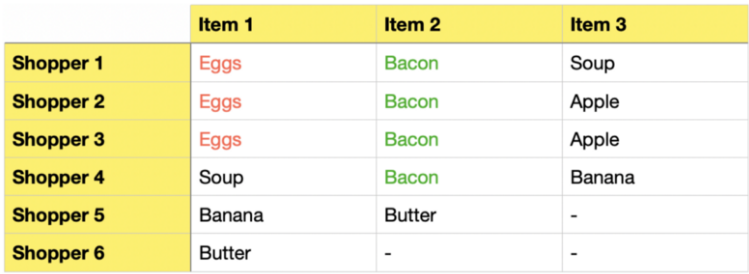


Assume we analyze the above transaction data to find frequently bought items and determine if they are often purchased together. To help us find the answers, we will make use of the following 4 metrics:

**1) Support**

**2) Confidence**

**3) Lift**

**4) Conviction**




**Support**

The first step for us and the algorithm is to find frequently bought items. It is a straightforward calculation that is based on frequency:

Support(A) = Transactions(A) / Total Transactions

So in our example:

Support(Eggs) = 3/6 = 1/2 = 0.5

Support(Bacon) = 4/6 = 2/3 = 0.667


For the sake of our example, let’s set minimum support to 0.5, which leaves us to work with Eggs and Bacon for the rest of this example.




**Confidence**



Now that we have identified frequently bought items let’s calculate confidence. This will tell us how confident (based on our data) we can be that an item will be purchased, given that another item has been purchased.

Confidence(A→B) = Probability(A & B) / Support(A)
Note, confidence is the same as what is also known as conditional probability in statistics:
P(B|A) = P(A & B) / P(A)

Please beware of the notation. The above two equeations are equivalent, although the notations are in different order: (A→B) is the same as (B|A).


So, let’s calculate confidence for our example:

Confidence(Eggs→Bacon) = P(Eggs & Bacon) / Support(Eggs) = (3/6) / (3/6) = 1

Confidence(Bacon→Eggs) = P(Eggs & Bacon) / Support(Bacon) = (3/6) / (2/3) = 3/4 = 0.75


The above tells us that whenever eggs are bought, bacon is also bought 100% of the time. Also, whenever bacon is bought, eggs are bought 75% of the time.

**Lift**

Given that different items are bought at different frequencies, how do we know that eggs and bacon really do have a strong association, and how do we measure it? You will be glad to hear that we have a way to evaluate this objectively using lift.


There are multiple ways to express the formula to calculate lift. Let me first show what the formulas look like, and then I will describe an intuitive way for you to think about it.


Lift(A→B) = Probability(A & B) / (Support(A) * Support(B))


You should be able to spot that we can simplify this formula by replacing P(A&B)/Sup(A) with Confidence(A→B). Hence, we have:

Lift(A→B) = Confidence(A→B) / Support(B)

Let’s calculate lift for our associated items:

Lift(Eggs→Bacon) = Confidence(Eggs→Bacon) / Support(Bacon) = 1 / (2/3) = 1.5

Lift(Bacon→Eggs) = Confidence(Bacon→Eggs) / Support(Eggs) = (3/4) / (1/2) = 1.5

Lift for the two items is equal to 1.5. Note, lift>1 means that the two items are more likely to be bought together, while lift<1 means that the two items are more likely to be bought separately. Finally, lift=1 means that there is no association between the two items.



**Conviction**

Conviction is another way of measuring association, although it is a bit harder to get your head around. It compares the probability that A appears without B if they were independent with the actual frequency of the appearance of A without B. Let’s take a look at the general formula first:

Conviction(A→B) = (1 - Support(B)) / (1 - Confidence(A→B))
In our example, this would be:

Conviction(Eggs→Bacon) = (1 - Sup(Bacon) / (1 - Conf(Eggs→Bacon)) = (1 - 2/3) / (1 - 1) = (1/3) / 0 = infinity

Conviction(Bacon→Eggs) = (1 - Sup(Eggs) / (1 - Conf(Bacon→Eggs)) = (1 - 1/2) / (1 - 3/4) = (1/2) / (1/4) = 2


As you can see, we had a division by 0 when calculating conviction for (Eggs→Bacon) and this is because we do not have a single instance of eggs being bought without bacon (confidence=100%).

In general, high confidence for A→B with low support for item B would yield a high conviction.

# **Implementation:**

In [1]:
!pip install efficient_apriori

In [2]:
!pip install efficient_apriori

In [3]:
!pip install efficient_apriori

In [5]:
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for ploting frequency distribution chart
from efficient_apriori import apriori # for association analysis

# Other utilities
import sys
import os

# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])

In [7]:
# Ingest the data
df = pd.read_csv(r'C:\Users\rushikesh\Downloads\Market_Basket_Optimisation.csv')
# Show dataframe
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Put all transactions into a single list
txns=df.values.reshape(-1).tolist()

# Create a dataframe using this single list and add a column for count
df_list=pd.DataFrame(txns)
df_list['Count']=1

# Group by items and rename columns
df_list=df_list.groupby(by=[0], as_index=False).count().sort_values(by=['Count'], ascending=True) # count
df_list['Percentage'] = (df_list['Count'] / df_list['Count'].sum()) # percentage
df_list=df_list.rename(columns={0 : 'Item'})

# Show dataframe
df_list

,Item,Count,Percentage
0,asparagus,1,0.000034
112,water spray,3,0.000102
77,napkins,5,0.000170
34,cream,7,0.000239
11,bramble,14,0.000477
...,...,...,...
25,chocolate,1230,0.041918
43,french fries,1282,0.043690
100,spaghetti,1306,0.044508
37,eggs,1348,0.045939


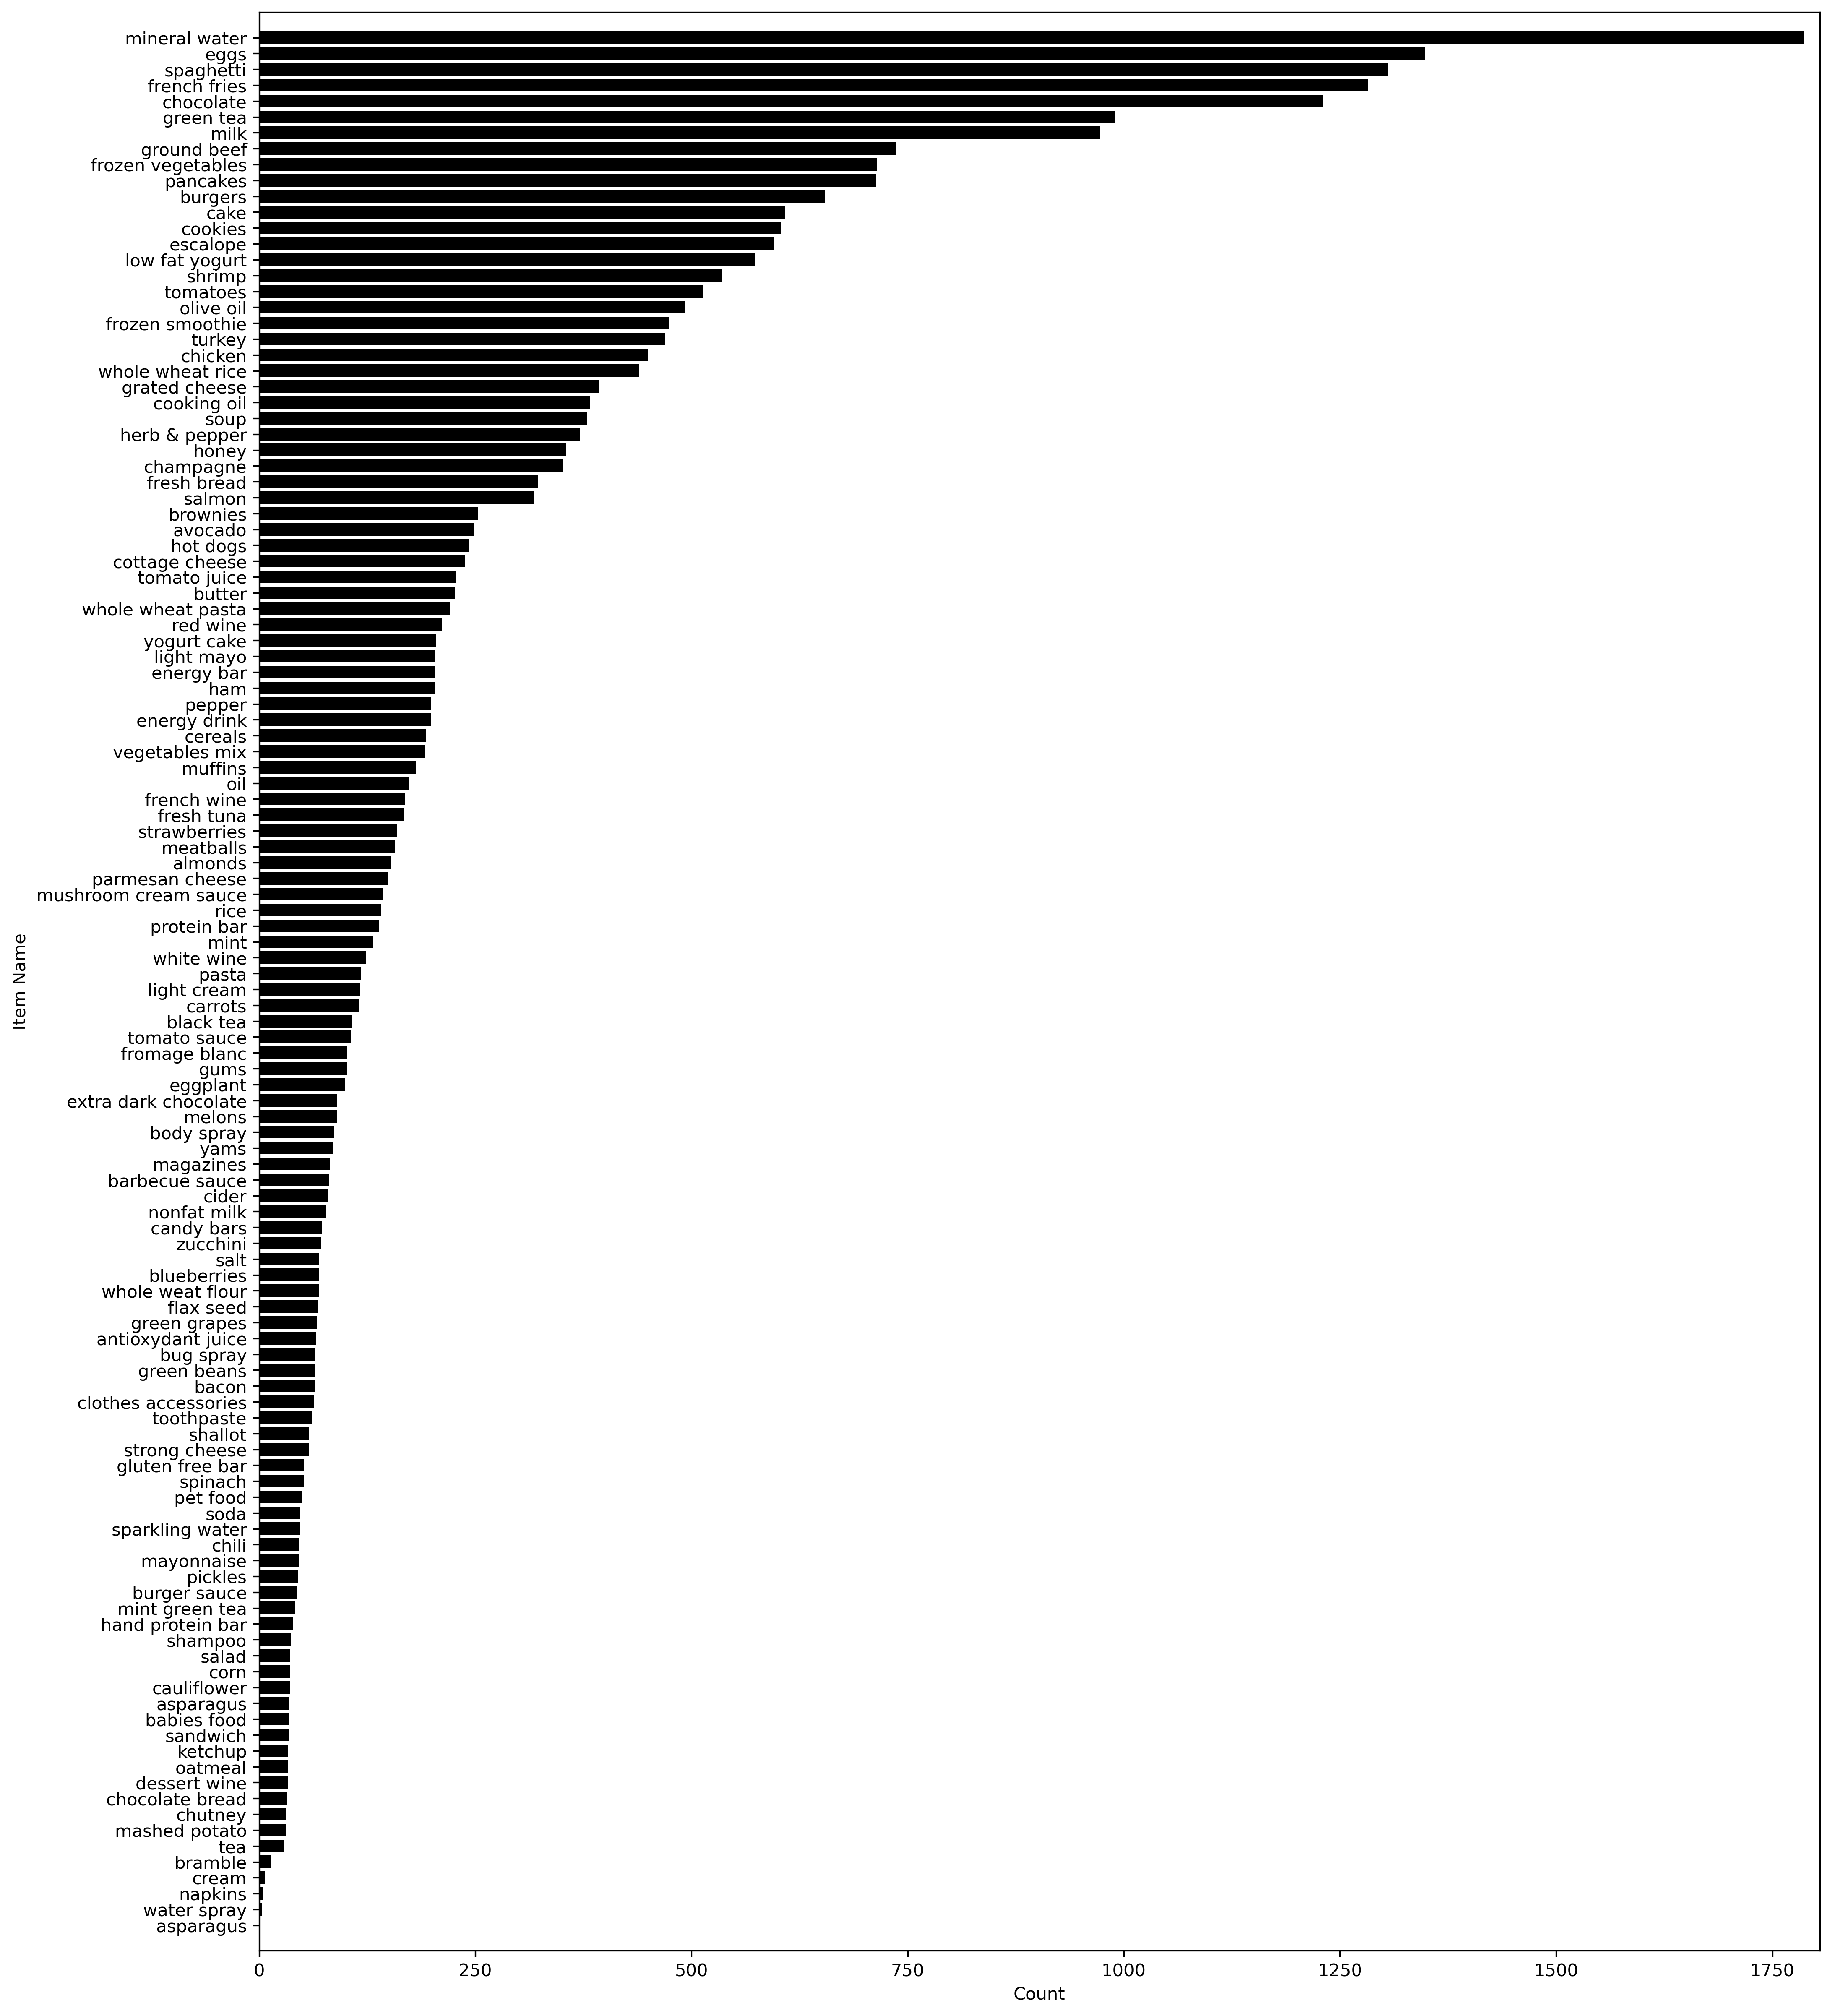

In [8]:
# Draw a horizontal bar chart
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(df_list['Item'], width=df_list['Count'], color='black', height=0.8)
plt.margins(0.01)   
plt.show()

In [11]:
# Create a list of lists from a dataframe
txns2=df.stack().groupby(level=0).apply(list).tolist()
# Show what it looks like
txns2

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [13]:
itemsets, rules = apriori(txns2, min_support=0.03, min_confidence=0.2, verbosity=1)

Generating itemsets.
 Counting itemsets of length 1.
  Found 120 candidate itemsets of length 1.
  Found 36 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 630 candidate itemsets of length 2.
  Found 18 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 14 candidate itemsets of length 3.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.



In [15]:
itemsets

{1: {('burgers',): 654,
  ('eggs',): 1348,
  ('turkey',): 469,
  ('avocado',): 249,
  ('mineral water',): 1787,
  ('milk',): 972,
  ('whole wheat rice',): 439,
  ('green tea',): 990,
  ('low fat yogurt',): 573,
  ('french fries',): 1282,
  ('soup',): 379,
  ('frozen vegetables',): 715,
  ('spaghetti',): 1306,
  ('cookies',): 603,
  ('cooking oil',): 383,
  ('champagne',): 351,
  ('salmon',): 318,
  ('shrimp',): 535,
  ('chocolate',): 1229,
  ('chicken',): 450,
  ('honey',): 355,
  ('tomatoes',): 513,
  ('pancakes',): 713,
  ('grated cheese',): 393,
  ('fresh bread',): 323,
  ('ground beef',): 737,
  ('frozen smoothie',): 474,
  ('escalope',): 595,
  ('herb & pepper',): 371,
  ('cake',): 608,
  ('cottage cheese',): 238,
  ('hot dogs',): 243,
  ('brownies',): 253,
  ('olive oil',): 493,
  ('butter',): 226,
  ('tomato juice',): 227},
 2: {('chocolate', 'eggs'): 249,
  ('chocolate', 'french fries'): 258,
  ('chocolate', 'milk'): 241,
  ('chocolate', 'mineral water'): 395,
  ('chocolate', '

In [17]:
for item in sorted(rules, key=lambda item: (item.lift,item.conviction), reverse=True):
    print(item)

{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{spaghetti} -> {ground beef} (conf: 0.225, supp: 0.039, lift: 2.291, conv: 1.164)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.573, conv: 1.218)
{milk} -> {spaghetti} (conf: 0.274, supp: 0.035, lift: 1.572, conv: 1.137)
{spaghetti} -> {milk} (conf: 0.204, supp: 0.035, lift: 1.572, conv: 1.093)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {chocolate} (conf: 0.248, supp: 0.032, lift: 1.513, conv: 1.112)
{pancakes} -> {mineral water} (conf: 0.355, supp: 0.034, lift: 1.489, conv: 1.181)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)
{chocolate} -> {spaghett

# **Conclusion :**
Apriori is a straightforward algorithm that quickly learns association rules between items (data points).One thing to be careful about when using Apriori on large datasets is the choice of minimum support threshold. If you are not careful, you can quickly run out of memory with a potentially huge number of itemsets of size 2.